### 판다스

In [22]:
import pandas as pd

# 데이터 확인
happiness_df = pd.read_csv('./datasets/happiness_report_2023.csv')
print(happiness_df.columns)
print(happiness_df.index)
print(happiness_df.index.values)
happiness_df.info()
happiness_df.dtypes
happiness_df.shape
display(happiness_df)

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')
RangeIndex(start=0, stop=137, step=1)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------  

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [23]:
# 4분위수 확인
display(happiness_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
happiness_score,137.0,5.539796,1.139929,1.859,4.7240,5.6840,6.3340,7.804
gdp_per_capita,137.0,1.406985,0.432963,0.000,1.0990,1.4490,1.7980,2.200
social_support,137.0,1.156212,0.326322,0.000,0.9620,1.2270,1.4010,1.620
healthy_life_expectancy,136.0,0.366176,0.156691,0.000,0.2485,0.3895,0.4875,0.702
freedom_to_make_life_choices,137.0,0.540000,0.149501,0.000,0.4550,0.5570,0.6560,0.772
generosity,137.0,0.148474,0.076053,0.000,0.0970,0.1370,0.1990,0.422
perceptions_of_corruption,137.0,0.145898,0.126723,0.000,0.0600,0.1110,0.1870,0.561


In [26]:
import numpy as np
from scipy.stats import iqr

# 행복 점수
happiness_Q1 = happiness_df.describe().T.loc['happiness_score', '25%']
happiness_Q3 = happiness_df.describe().T.loc['happiness_score', '75%']
print(happiness_Q1, happiness_Q3)

iqr_value = iqr(happiness_df.happiness_score)
print(iqr_value)

lower_bound = happiness_Q1 - 1.5 * iqr_value
upper_bound = happiness_Q3 + 1.5 * iqr_value
print(f'행복 점수의 정상치 범위: {lower_bound} ~ {upper_bound}')
# 이상치 제거
happiness_df = happiness_df[(happiness_df['happiness_score'] >= lower_bound) & (happiness_df['happiness_score'] <= upper_bound)]
print(happiness_df['happiness_score'].count())

4.724 6.334
1.6099999999999994
행복 점수의 정상치 범위: 2.309000000000001 ~ 8.748999999999999
136


In [27]:
# 국가 내 부패에 대한 인식의 척도
corruption_Q1 = happiness_df.describe().T.loc['perceptions_of_corruption', '25%']
corruption_Q3 = happiness_df.describe().T.loc['perceptions_of_corruption', '75%']
print(corruption_Q1, corruption_Q3)

iqr_value = iqr(happiness_df.perceptions_of_corruption)
print(iqr_value)

lower_bound = corruption_Q1 - 1.5 * iqr_value
upper_bound = corruption_Q3 + 1.5 * iqr_value
print(f'부패에 대한 인식의 정상치 범위: {lower_bound} ~ {upper_bound}')

# 이상치 제거
happiness_df = happiness_df[(happiness_df['perceptions_of_corruption'] >= lower_bound) & (happiness_df['perceptions_of_corruption'] <= upper_bound)]
print(happiness_df['perceptions_of_corruption'].count())

0.06 0.18825
0.12825
부패에 대한 인식의 정상치 범위: -0.13237500000000002 ~ 0.380625
125


In [5]:
# 평균, 중앙, 최빈(df.mode())
# 평균
hp_mean_df = happiness_df.groupby('region')[['happiness_score', 'perceptions_of_corruption']].mean().reset_index()
display(hp_mean_df)

# 중앙
hp_mid_df = happiness_df.groupby('region')[['happiness_score', 'perceptions_of_corruption']].median().reset_index()
display(hp_mid_df)

# 표준편차
hp_std_df = happiness_df.groupby('region')[['happiness_score', 'perceptions_of_corruption']].std().reset_index()
display(hp_std_df)

# 최빈
# hp_mode_df = happiness_df.groupby('region')['happiness_score'].agg(**{'most_common_value':lambda x:x.mode()}).reset_index()
# display(hp_mode_df)

,region,happiness_score,perceptions_of_corruption
0,Central and Eastern Europe,5.967091,0.076227
1,Commonwealth of Independent States,5.828250,0.166750
2,East Asia,5.930167,0.190167
3,Latin America and Caribbean,5.966053,0.104632
4,Middle East and North Africa,5.102143,0.124786
5,North America and ANZ,7.018250,0.329250
6,South Asia,4.089000,0.104500
7,Southeast Asia,5.431222,0.156000
8,Sub-Saharan Africa,4.382485,0.102697
9,Western Europe,6.894350,0.301550


,region,happiness_score,perceptions_of_corruption
0,Central and Eastern Europe,6.0830,0.0555
1,Commonwealth of Independent States,5.9195,0.1785
2,East Asia,5.8955,0.1705
3,Latin America and Caribbean,6.0240,0.0760
4,Middle East and North Africa,4.9055,0.1340
5,North America and ANZ,7.0280,0.3370
6,South Asia,4.3620,0.1030
7,Southeast Asia,5.5230,0.1220
8,Sub-Saharan Africa,4.4320,0.1010
9,Western Europe,6.9015,0.3250


,region,happiness_score,perceptions_of_corruption
0,Central and Eastern Europe,0.559300,0.085096
1,Commonwealth of Independent States,0.357055,0.115226
2,East Asia,0.403384,0.110101
3,Latin America and Caribbean,0.381950,0.068687
4,Middle East and North Africa,1.263875,0.074270
5,North America and ANZ,0.108902,0.124363
6,South Asia,1.180692,0.034990
7,Southeast Asia,0.732066,0.163340
8,Sub-Saharan Africa,0.675345,0.060644
9,Western Europe,0.557576,0.168664


<Axes: title={'center': 'std'}, xlabel='region', ylabel='happiness_score'>

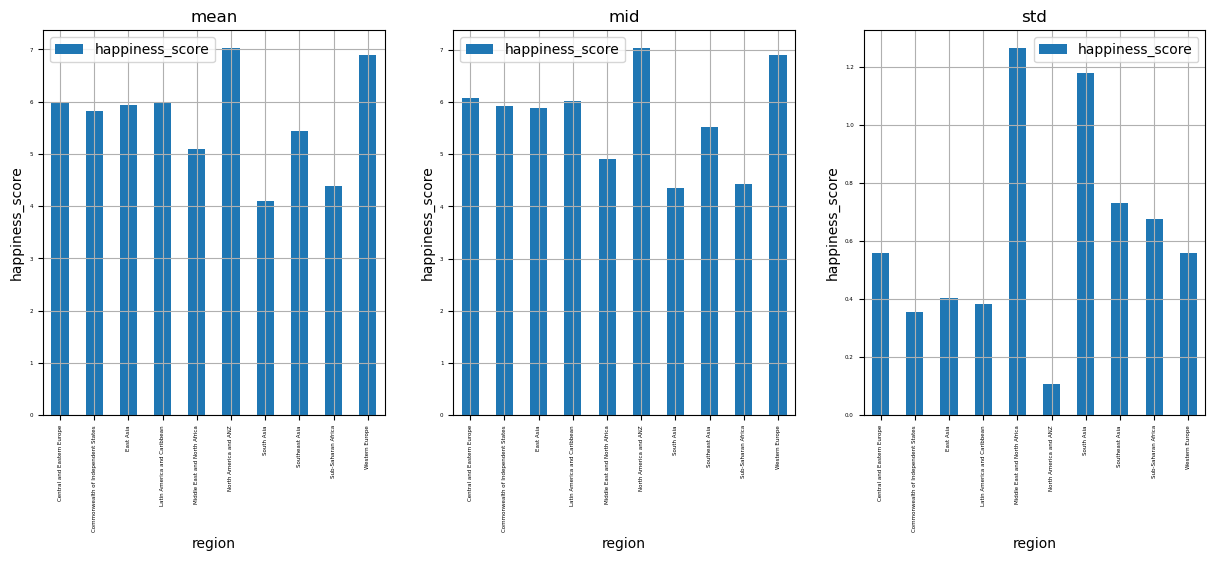

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

hp_mean_df.plot(title='mean', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="happiness_score")
hp_mid_df.plot(title='mid', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="happiness_score")
hp_std_df.plot(title='std', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="happiness_score")

<Axes: title={'center': 'std'}, xlabel='region', ylabel='perceptions_of_corruption'>

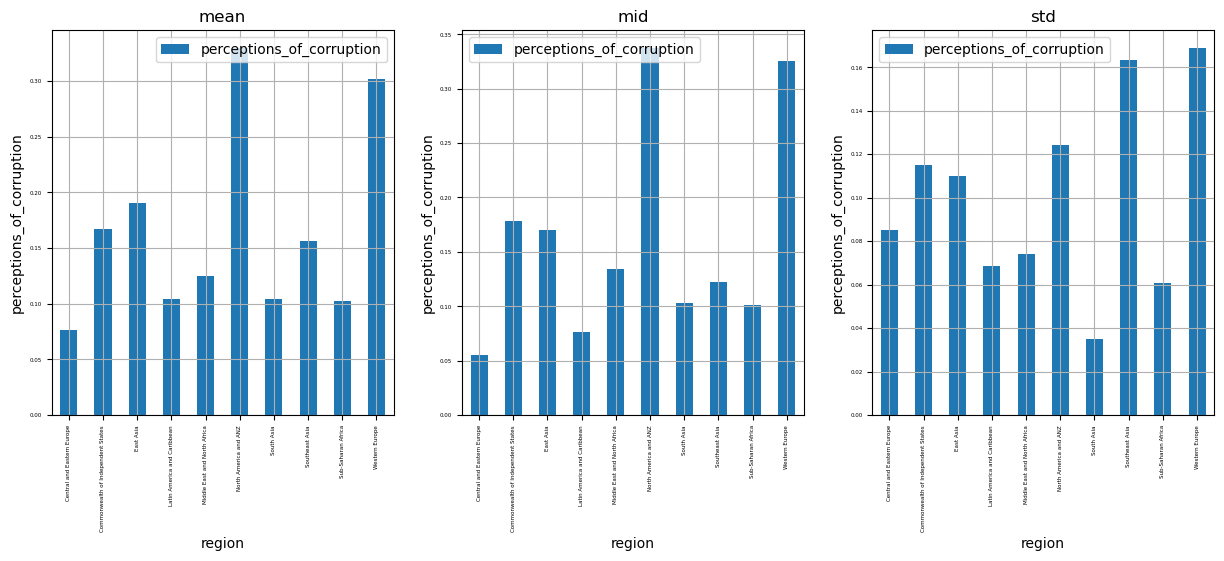

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

hp_mean_df.plot(title='mean', x='region', y='perceptions_of_corruption', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="perceptions_of_corruption")
hp_mid_df.plot(title='mid', x='region', y='perceptions_of_corruption', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="perceptions_of_corruption")
hp_std_df.plot(title='std', x='region', y='perceptions_of_corruption', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="perceptions_of_corruption")

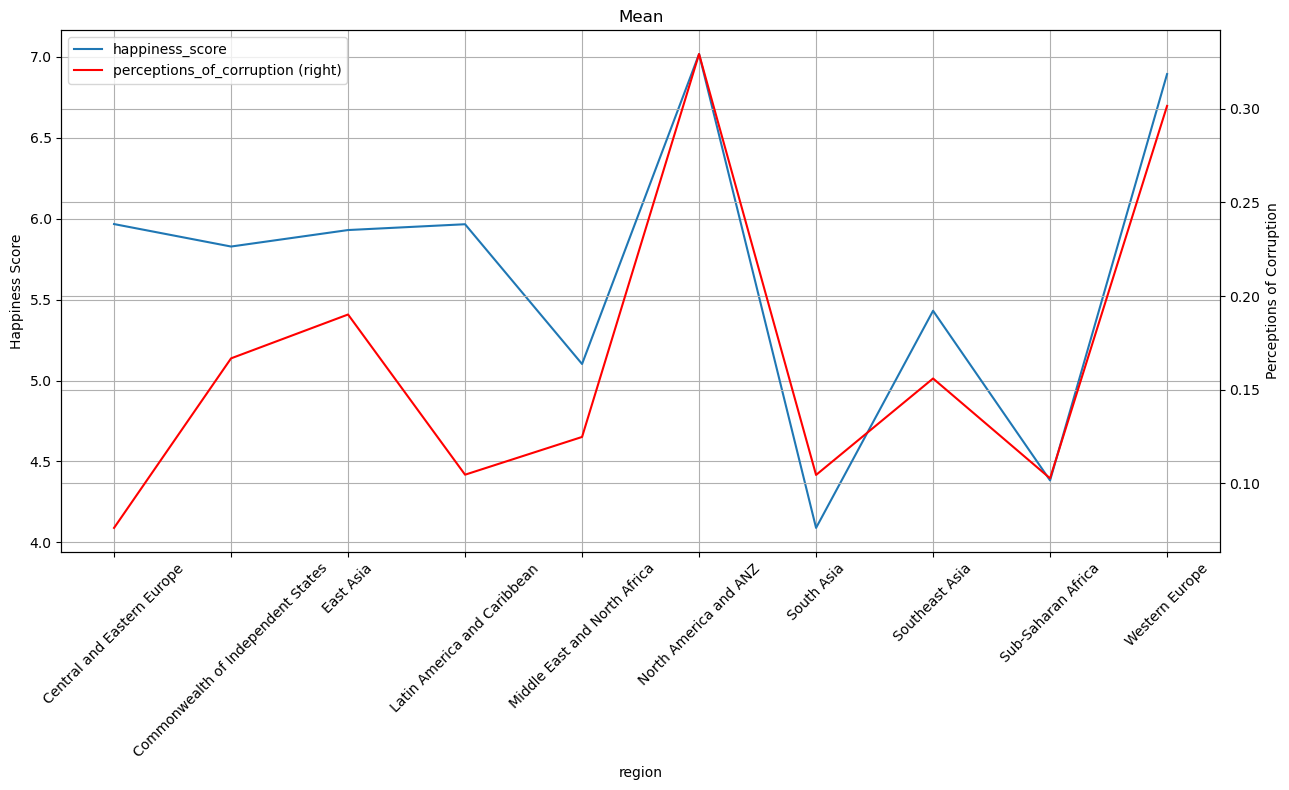

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(13, 8))

# 첫 번째 그래프: happiness_score 평균
hp_mean_df.plot(title='Mean', x='region', y='happiness_score', fontsize=10, kind='line', grid=True, ax=ax, ylabel="Happiness Score", rot=45)

# 두 번째 그래프: perceptions_of_corruption 평균
hp_mean_df.plot(title='Mean', x='region', y='perceptions_of_corruption', fontsize=10, kind='line', grid=True, ax=ax, secondary_y=True, color='red', ylabel="Perceptions of Corruption", rot=45)

plt.xticks(range(len(hp_mean_df['region'])), hp_mean_df['region'], rotation=45)  
# x 축의 눈금을 데이터의 모든 라벨로 설정하고, 45도로 회전
plt.tight_layout()
plt.show()


#### 2023년도 국가 내 부패에 대한 인식의 척도에 따른 지역별 행복지수 보고서
- "happiness_score" (행복 점수)의 평균값을 오름차순으로 나열  
South Asia: 4.089000  
Sub-Saharan Africa: 4.382485  
Southeast Asia: 5.431222  
Middle East and North Africa: 5.102143  
Commonwealth of Independent States: 5.828250  
Central and Eastern Europe: 5.967091  
Latin America and Caribbean: 5.966053  
East Asia: 5.930167  
Western Europe: 6.894350  
North America and ANZ: 7.018250 순서이다.  

- "Perceptions of Corruption" (국가 내 부패에 대한 인식의 척도)의 평균값을 오름차순으로 나열  
Central and Eastern Europe: 0.076227  
Sub-Saharan Africa: 0.102697  
South Asia: 0.104500  
Latin America and Caribbean: 0.104632  
Middle East and North Africa: 0.124786  
Southeast Asia: 0.156000  
Commonwealth of Independent States: 0.166750  
East Asia: 0.190167  
Western Europe: 0.301550  
North America and ANZ: 0.329250 순서이다.  
  
- 두 feature에 대한 데이터를 보면, 상위 3개(북미, 서부유럽, 동아시아)의 지역은 완전히 동일함을 확인 할 수 있다. 그에 비해 하위 7개의 지역은 순서가 상이함을 확인 할 수 있다.   

📌 요약하자면, 행복점수가 높은 상위 지역들에서는 "Perceptions of Corruption"도 높지만, 이닌 지역에서는 "Perceptions of Corruption"와 행복지수의 상관관계가 크지 않다는 것 을 의미한다.  

In [9]:
# 결측치
happiness_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [10]:
happiness_df['healthy_life_expectancy'].value_counts()

healthy_life_expectancy
0.535    3
0.389    3
0.435    2
0.408    2
0.145    2
        ..
0.383    1
0.387    1
0.622    1
0.580    1
0.398    1
Name: count, Length: 111, dtype: int64

In [11]:
happiness_df.count()

country                         137
region                          137
happiness_score                 137
gdp_per_capita                  137
social_support                  137
healthy_life_expectancy         136
freedom_to_make_life_choices    137
generosity                      137
perceptions_of_corruption       137
dtype: int64

In [12]:
happiness_df[happiness_df['healthy_life_expectancy'].isna()]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
98,State of Palestine,Middle East and North Africa,4.908,1.144,1.309,NaN,0.416,0.065,0.067


In [13]:
# 결측치가 있는 지역
happiness_df[happiness_df['healthy_life_expectancy'].isna()]['region']

98    Middle East and North Africa
Name: region, dtype: object

In [30]:
# 결측치가 없는 행만 가져오기
no_nan_middle_east = happiness_df[~ happiness_df['healthy_life_expectancy'].isna()]
no_nan_middle_east.iloc[98]

country                                      Kenya
region                          Sub-Saharan Africa
happiness_score                              4.487
gdp_per_capita                               1.051
social_support                               0.881
healthy_life_expectancy                       0.19
freedom_to_make_life_choices                 0.418
generosity                                   0.291
perceptions_of_corruption                    0.055
Name: 110, dtype: object

In [38]:
# Middle East and North Africa 지역의 healthy_life_expectancy 열의 값이 결측치가 아닌 행만 가져오기
filtered_data = no_nan_middle_east[(no_nan_middle_east['region'] == 'Middle East and North Africa')]

# 해당 값들의 평균 계산
average_healthy_life_expectancy = filtered_data['healthy_life_expectancy'].mean()
average_healthy_life_expectancy

0.4038461538461538

In [37]:
# 결측치를 해당 지역의 평균값으로 대체
happiness_df['healthy_life_expectancy'] = happiness_df['healthy_life_expectancy'].fillna(average_healthy_life_expectancy)

# 결측치 재확인
happiness_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64